# *Optical Tweezers* | Lab-Session #1
## Feb-03-2021 13:45

This jupyter notebook is a used to collect and analyse data during today's lab session

In [78]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as const
import scipy.signal
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

Data were collected for the calibration of the optical trap, by trapping a bead and plotting the power spectrum of each coordinate.

In [79]:
# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
DATA = pd.read_csv(csvs[0])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array

## Store the different variables
t = data[0]
x = data[1]
y = data[3]
z = data[5]

DATA                            # Prints pretty PANDAS data frame

List of .csv files in .
	 0 : x-y-z-positions-01.csv


Time - Dev1/ai0  Voltage - Dev1/ai0  Time - Dev1/ai1  \
0               0.00000            0.065681          0.00000   
1               0.00001            0.064080          0.00001   
2               0.00002            0.060237          0.00002   
3               0.00003            0.057995          0.00003   
4               0.00004            0.057675          0.00004   
...                 ...                 ...              ...   
499995          4.99995            0.024051          4.99995   
499996          4.99996            0.025332          4.99996   
499997          4.99997            0.025012          4.99997   
499998          4.99998            0.024051          4.99998   
499999          4.99999            0.021810          4.99999   

        Voltage - Dev1/ai1  Time - Dev1/ai2  Voltage - Dev1/ai2  
0                -0.161813          0.00000             3.05292  
1                -0.163093          0.00001             3.05228  
2                -0.162773          0.00002             3.05132  
3                -0.160852          0.00003             3.05164  
4                -0.157971          0.00004             3.05292  
...                    ...              ...                 ...  
499995           -0.091384          4.99995             3.07657  
499996           -0.092664          4.99996             3.07657  
499997           -0.090423          4.99997             3.07817  
499998           -0.088502          4.99998             3.07721  
499999           -0.083380          4.99999             3.08169  

[500000 rows x 6 columns]

# Data Analysis

We are first going to plot the coordinates as imported form the qpd as a function of time

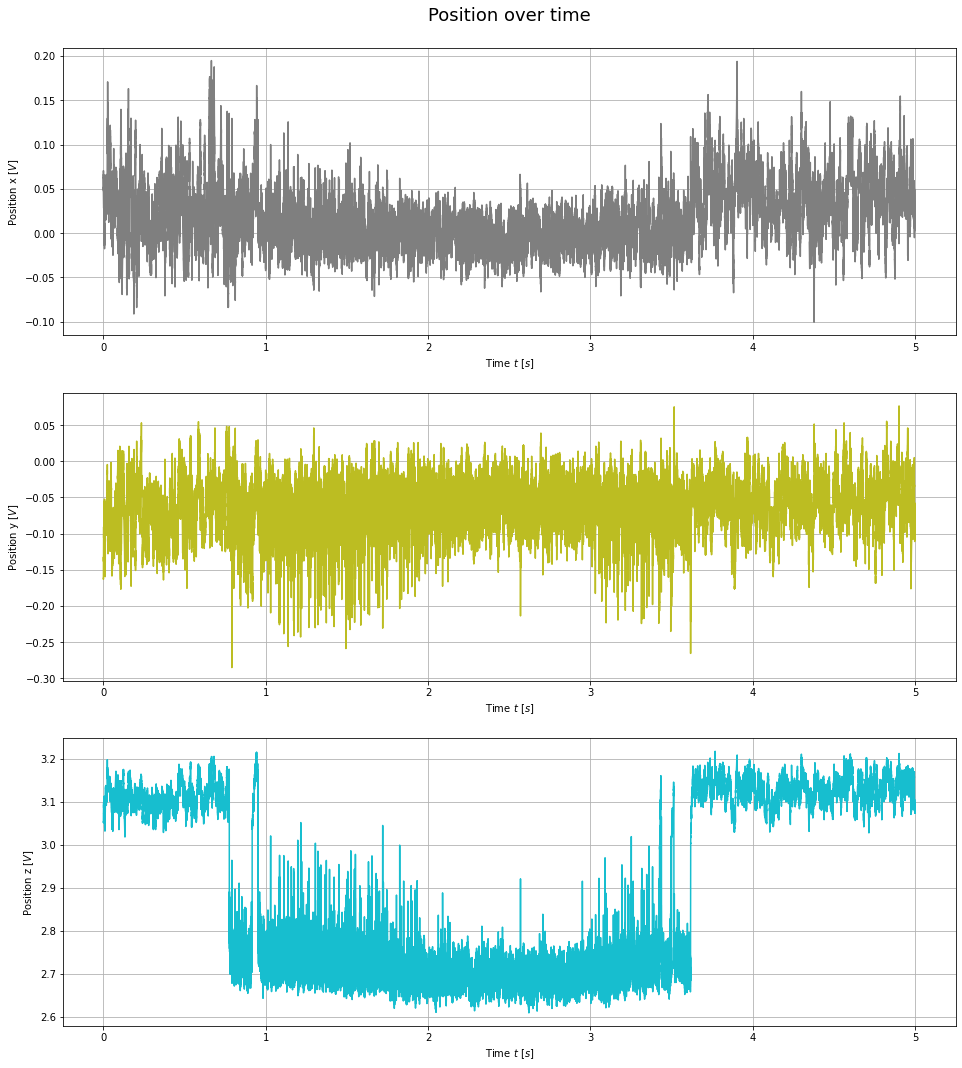

In [80]:
# Plotting X-Y-Z
# Set up figure
fig = plt.figure(figsize=(16,18))

coords = [x,y,z]
labels = ['x','y','z']

for i in range(0,3):
    ax = fig.add_subplot(311+i)
    if i==0: ax.set_title('Position over time\n',fontsize=18)
    ax.set_xlabel(r'Time $t\ [s]$')
    ax.set_ylabel('Position ' + labels[i] + r' $ [V]$')
    ax.grid()

    ax.plot(t,coords[i],c='C%d'%(i+7))


## Power Spectrum

Now to get the power spectrum we have to do an FFT of this signal.

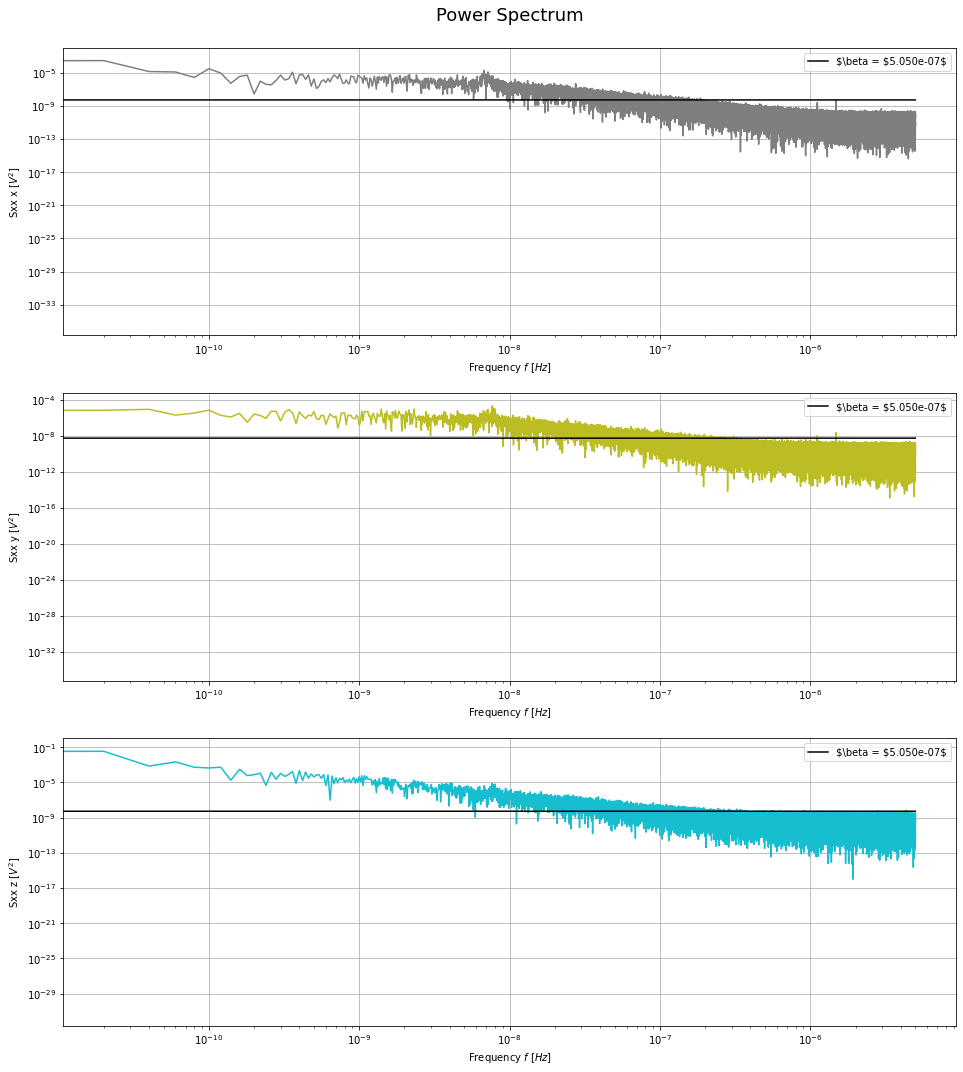

In [81]:
# Power spectrum
# Function to attempt to fit the power spectrum with
eta = 2.414e-5
d   = 2e-6
def Sxx(f,alpha):
    T = 294.15
    beta = 3*np.pi*eta*d
    return np.sqrt((const.k*T)/(np.pi**2 * beta*(f**2 + (alpha/(2*np.pi*beta))**2)))

fig = plt.figure(figsize=(16,18))

# Calculate the power spectrum 
coords = [x,y,z]
labels = ['x','y','z']
fs = (max(t)-min(t))/len(t)

for i in range(0,len(coords)):
    # Adding the necessary plot elements
    ax = fig.add_subplot(311+i)
    if i==0: ax.set_title('Power Spectrum\n',fontsize=18)
    ax.set_xlabel(r'Frequency $f\ [Hz]$')
    ax.set_ylabel('Sxx ' + labels[i] + r' $ [V^2]$')
    ax.grid()

    # Obtaining the power spectrum
    f,pxx = scipy.signal.periodogram(coords[i],fs=fs,scaling='spectrum')

    # Fit the curve with the Sxx model
    params, _ = curve_fit(Sxx,f,pxx,bounds=(1e-8,1e-6))

    # Plot the power spectrum
    ax.plot(f,pxx,c='C%d'%(i+7))

    # Plot the fit
    ax.plot(f,Sxx(f,*params),c='k',label=r'$\beta = $%1.3e$'%(params[0]))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

# Potential Energy

Now we will plot the potential energy of each of those thingys

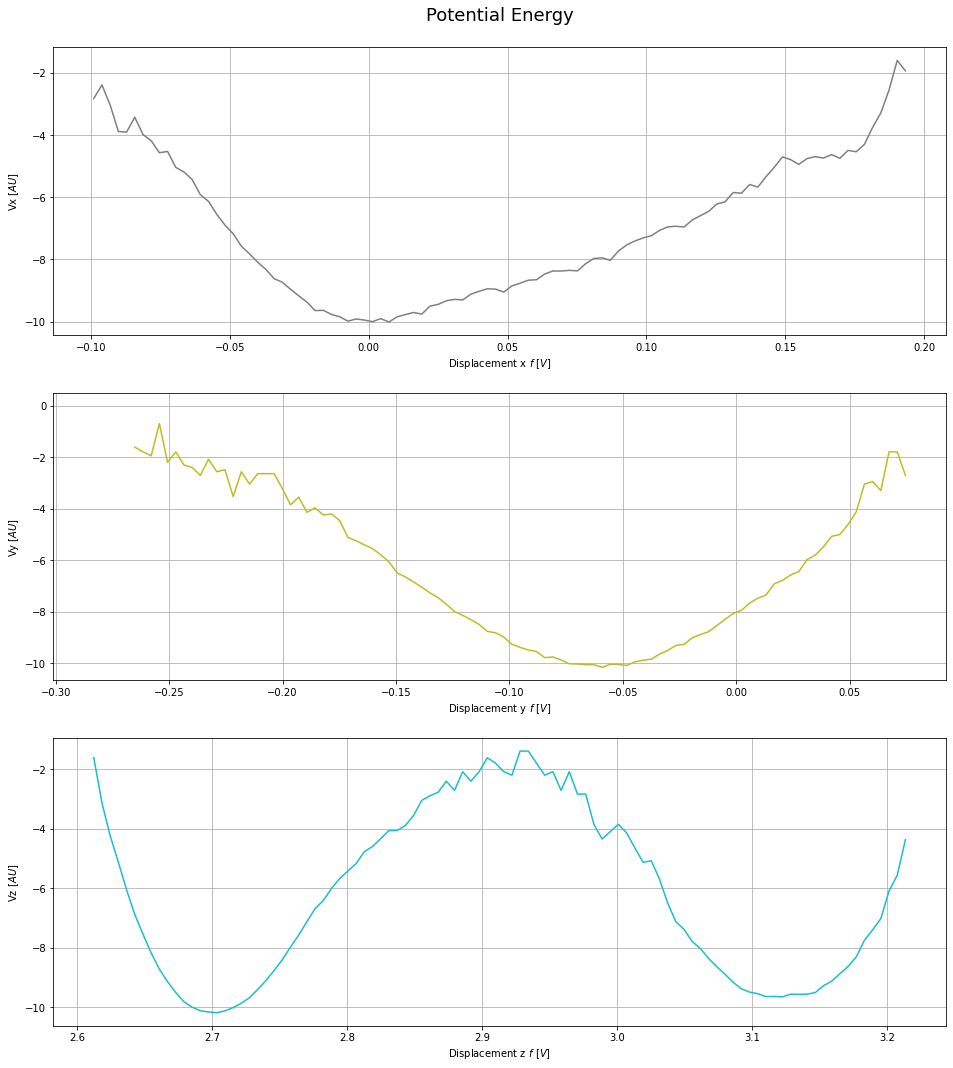

In [90]:
# Potential energy
# Function to attempt to fit the power spectrum with
fig = plt.figure(figsize=(16,18))

# Calculate the power spectrum 
coords = [x,y,z]
labels = ['x','y','z']
Nbins = 100

for i in range(0,len(coords)):
    # Adding the necessary plot elements
    ax = fig.add_subplot(311+i)
    if i==0: ax.set_title('Potential Energy\n',fontsize=18)
    ax.set_xlabel('Displacement '+labels[i]+r' $f\ [V]$')
    ax.set_ylabel('V' + labels[i] + r' $ [AU]$')
    ax.grid()

    # Obtaining the histogram of the data
    hist, xx = np.histogram(coords[i],bins=Nbins)
    xx = [(xx[i]+xx[i+1])/2 for i in range(len(xx)-1)]

    # Plot the potential energy
    ax.plot(xx,-np.log(hist),c='C%d'%(i+7))
    # ax.legend()

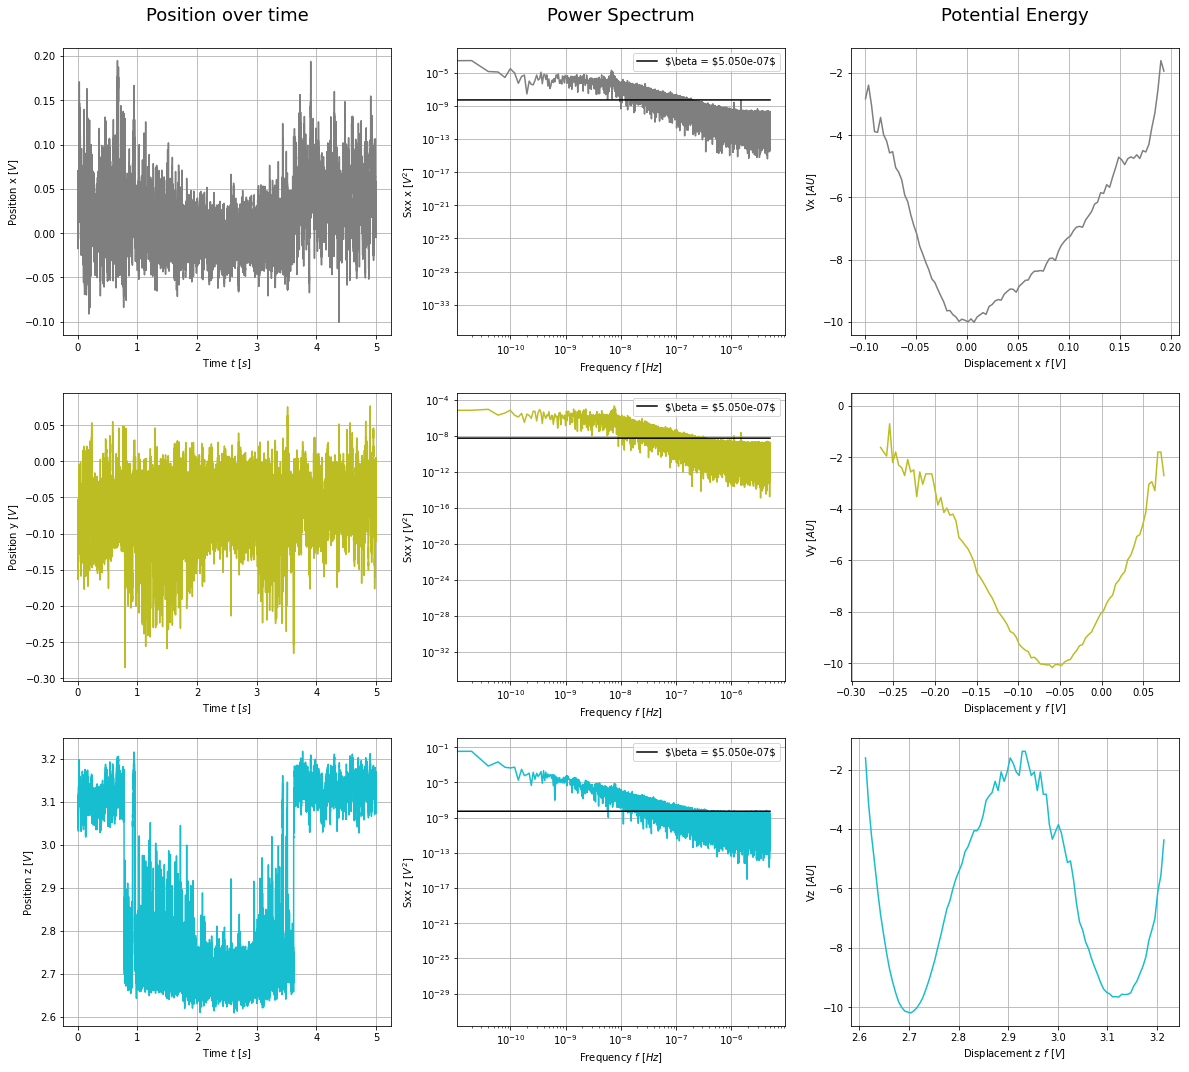

In [91]:
# All of them together
# Function to attempt to fit the power spectrum with
eta = 2.414e-5
d   = 2e-6
def Sxx(f,alpha):
    T = 294.15
    beta = 3*np.pi*eta*d
    return np.sqrt((const.k*T)/(np.pi**2 * beta*(f**2 + (alpha/(2*np.pi*beta))**2)))

fig = plt.figure(figsize=(20,18))

# Calculate the power spectrum 
coords = [x,y,z]
labels = ['x','y','z']
fs = (max(t)-min(t))/len(t)
Nbins = 100

for i in range(0,3):
    ax = fig.add_subplot(331+i*3)
    if i==0: ax.set_title('Position over time\n',fontsize=18)
    ax.set_xlabel(r'Time $t\ [s]$')
    ax.set_ylabel('Position ' + labels[i] + r' $ [V]$')
    ax.grid()

    ax.plot(t,coords[i],c='C%d'%(i+7))

    # Adding the necessary plot elements
    ax = fig.add_subplot(332+i*3)
    if i==0: ax.set_title('Power Spectrum\n',fontsize=18)
    ax.set_xlabel(r'Frequency $f\ [Hz]$')
    ax.set_ylabel('Sxx ' + labels[i] + r' $ [V^2]$')
    ax.grid()

    # Obtaining the power spectrum
    f,pxx = scipy.signal.periodogram(coords[i],fs=fs,scaling='spectrum')

    # Fit the curve with the Sxx model
    params, _ = curve_fit(Sxx,f,pxx,bounds=(1e-8,1e-6))

    # Plot the power spectrum
    ax.plot(f,pxx,c='C%d'%(i+7))

    # Plot the fit
    ax.plot(f,Sxx(f,*params),c='k',label=r'$\beta = $%1.3e$'%(params[0]))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

    # Adding the necessary plot elements
    ax = fig.add_subplot(333+i*3)
    if i==0: ax.set_title('Potential Energy\n',fontsize=18)
    ax.set_xlabel('Displacement '+labels[i]+r' $f\ [V]$')
    ax.set_ylabel('V' + labels[i] + r' $ [AU]$')
    ax.grid()

    # Obtaining the histogram of the data
    hist, xx = np.histogram(coords[i],bins=Nbins)
    xx = [(xx[i]+xx[i+1])/2 for i in range(len(xx)-1)]

    # Plot the potential energy
    ax.plot(xx,-np.log(hist),c='C%d'%(i+7))
    # ax.legend()